In [ ]:
# Sharpening and histogram equalization article
# http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

In [60]:
import sys, numpy

In [63]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# http://stackoverflow.com/questions/20953273/install-opencv-for-python-3-3
# http://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv
import cv2

In [96]:
testImage = cv2.imread("ContrastTest.png", cv2.IMREAD_GRAYSCALE)

In [97]:
testImage.shape

(197, 210)

In [98]:
Vcol0 = 1.2 * (testImage[0] / 2.0)
len(Vcol0)

210

In [153]:
def func2d(f, A):
    return f(map(f, A))

In [160]:
def testFunc2d():
    def my_min(A):
        return min(A)
    A = numpy.array([[3, 4], [2, 1]])
    m = func2d(my_min, A)
    return m
#
print(str(testFunc2d()))

1


In [241]:
def hist256(array2D):
    shape = array2D.shape
    H = [0]*256
    for i in range(shape[0]):
        for j in range(shape[1]):
            H[array2D[i][j]] = H[array2D[i][j]] + 1
    return H

In [355]:
MIN_ZERO_TELOBUCKETS = 16
FUZZY_FACTOR = 6

def KSharpen(matrix2D):
    shape = matrix2D.shape
    H = hist256(matrix2D)

    Na = 0
    for i in range(256):
        if H[i] == 0:
            Na = Na + 1
        else:
            break
    Nz = 0
    for i in range(256):
        if H[255-i] == 0:
            Nz = Nz + 1
        else:
            break
            
    N = Na + Nz
    if N < MIN_ZERO_TELOBUCKETS:
        # Not enough wiggle room in the histogram to make it worth it
        return matrix2D
    
    sfactor = 255.0 / (255.0 - N)
    offset = Na
    # TODO:  Identify Optimal fuz factor equation.
    fuzzy = N / (FUZZY_FACTOR * 255.0)
    
    # Need signed type for numpy.diff to work
    matrix2D = matrix2D.astype(float) 
    matrix2D_t = matrix2D.transpose()
    
    Vcol0 = sfactor * ((matrix2D[0]) - offset)
    Vrow0 = sfactor * ((matrix2D_t[0]) - offset)
    # Purposely make dimensions a little different to get smooth histogram
    Drow = (sfactor + fuzzy) * numpy.diff(matrix2D, n=1, axis=0)
    Dcol = (sfactor - fuzzy) * numpy.diff(matrix2D_t, n=1, axis=0)
    scaleRows = matrix2D.astype(float)
    scaleCols = matrix2D_t.astype(float)
    
    scaleRows[0] = Vcol0
    for i in range(shape[0]-1):
        for j in range(shape[1]):
            scaleRows[i+1][j] = scaleRows[i][j] + Drow[i][j]
    
    
    scaleCols[0] = Vrow0
    for i in range(shape[1]-1):
        for j in range(shape[0]):
            scaleCols[i+1][j] = scaleCols[i][j] + Dcol[i][j]
    
    mxr = func2d(max, scaleRows)
    scaleRows = (255.0 / mxr) * scaleRows
    mxc = func2d(max, scaleCols)
    scaleCols = (255.0 / mxc) * scaleCols
    
    sharpened = (1.0/2.0) * ( scaleRows + scaleCols.transpose((1,0)) )
    # The difference between mxr and mxc gives some idea of difference in spreading.
    # The "crispest" picture actually comes with fuzzy == 0, the best histogram
    # comes with larger fuzzy factors (>6)
    # print(repr([mxr, mxc, func2d(max, sharpened)]))
    return (sharpened + 0.499999999).astype('uint8')


In [356]:
sharpened = KSharpen(testImage)

[261.10326797385619, 249.52810457516338, 255.0]


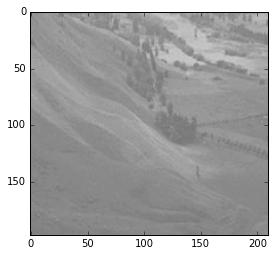

In [357]:
plt.imshow(testImage, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)


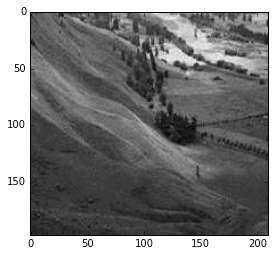

In [358]:
plt.imshow(sharpened, cmap = plt.get_cmap('gray'))

In [359]:
print(repr([func2d(min, sharpened), func2d(max, sharpened)]))

[0, 255]


In [360]:
hist256(sharpened)

[1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 4,
 1,
 13,
 6,
 12,
 21,
 10,
 18,
 30,
 20,
 29,
 30,
 18,
 55,
 29,
 42,
 55,
 48,
 89,
 81,
 56,
 93,
 94,
 80,
 97,
 85,
 96,
 159,
 115,
 144,
 208,
 129,
 207,
 217,
 178,
 280,
 218,
 200,
 350,
 193,
 299,
 390,
 191,
 453,
 465,
 377,
 767,
 535,
 795,
 1279,
 576,
 929,
 1067,
 460,
 833,
 683,
 447,
 733,
 475,
 449,
 619,
 379,
 399,
 593,
 325,
 445,
 431,
 332,
 460,
 350,
 357,
 465,
 348,
 360,
 416,
 348,
 376,
 427,
 311,
 391,
 353,
 305,
 397,
 350,
 340,
 381,
 305,
 423,
 411,
 292,
 439,
 366,
 338,
 434,
 409,
 432,
 483,
 343,
 447,
 318,
 324,
 333,
 306,
 248,
 280,
 268,
 232,
 234,
 216,
 259,
 233,
 161,
 201,
 190,
 178,
 177,
 178,
 160,
 199,
 127,
 173,
 171,
 136,
 142,
 162,
 102,
 151,
 133,
 110,
 102,
 93,
 135,
 97,
 83,
 106,
 89,
 76,
 64,
 72,
 88,
 80,
 80,
 78,
 81,
 67,
 67,
 53,
 52,
 59,
 52,
 65,
 60,
 55,
 45,
 29,
 39,
 33,
 23,
 40,
 36,
 30,
 28,
 24,
 45,
 33,
 35,
 22,
 16,
 27,
 36,
 24,
 